# 1.**Crime data**

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("crime_data.csv")

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

Hierarchical

In [6]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
df_norm = norm_func(df.iloc[:,1:])

In [8]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


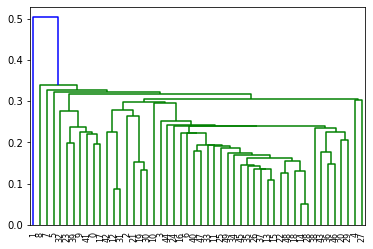

In [9]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [10]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [11]:
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=4)

In [12]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [13]:
df['h_clusterid'] = Clusters

In [14]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


K-Means

In [28]:
from sklearn.cluster import KMeans

In [17]:
 from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])

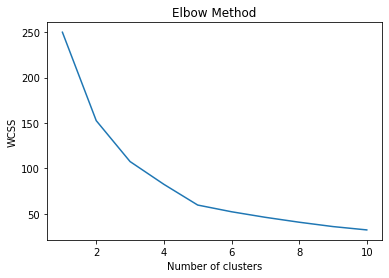

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [21]:
clusters_new.labels_

array([0, 3, 0, 2, 0, 0, 2, 2, 3, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [22]:
df['clusterid_new'] = clusters_new.labels_

In [25]:
clusters_new.cluster_centers_

array([[ 1.00135001,  0.96519777,  0.23370943,  0.74729574, -0.23284516],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842, -0.23284516],
       [-0.45151747, -0.35003177,  0.48366603, -0.25975046, -0.11870537],
       [ 1.13921666,  1.55442283, -0.10747222,  1.82997701,  4.61809563]])

In [26]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,12.105556,250.388889,68.888889,28.161111,0.000000
1,1,3.600000,78.538462,52.076923,12.176923,0.000000
2,2,5.841176,141.882353,72.470588,18.823529,0.058824
3,3,12.700000,299.000000,64.000000,38.200000,2.500000


In [27]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,3,3
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,0,0
5,Colorado,7.9,204,78,38.7,0,0
6,Connecticut,3.3,110,77,11.1,0,2
7,Delaware,5.9,238,72,15.8,1,2
8,Florida,15.4,335,80,31.9,2,3
9,Georgia,17.4,211,60,25.8,0,0


DBSCAN

In [45]:
from sklearn.cluster import DBSCAN

In [29]:
print(df.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape  h_clusterid  clusterid_new
0     Alabama    13.2      236        58  21.2            0              0
1      Alaska    10.0      263        48  44.5            3              3
2     Arizona     8.1      294        80  31.0            0              0
3    Arkansas     8.8      190        50  19.5            0              2
4  California     9.0      276        91  40.6            0              0


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50 non-null     object 
 1   Murder         50 non-null     float64
 2   Assault        50 non-null     int64  
 3   UrbanPop       50 non-null     int64  
 4   Rape           50 non-null     float64
 5   h_clusterid    50 non-null     int64  
 6   clusterid_new  50 non-null     int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 2.7+ KB
None


In [33]:
df.drop(['Unnamed: 0','Murder'],axis=1,inplace=True)

In [34]:
array = df.values

In [35]:
array

array([[236. ,  58. ,  21.2,   0. ,   0. ],
       [263. ,  48. ,  44.5,   3. ,   3. ],
       [294. ,  80. ,  31. ,   0. ,   0. ],
       [190. ,  50. ,  19.5,   0. ,   2. ],
       [276. ,  91. ,  40.6,   0. ,   0. ],
       [204. ,  78. ,  38.7,   0. ,   0. ],
       [110. ,  77. ,  11.1,   0. ,   2. ],
       [238. ,  72. ,  15.8,   1. ,   2. ],
       [335. ,  80. ,  31.9,   2. ,   3. ],
       [211. ,  60. ,  25.8,   0. ,   0. ],
       [ 46. ,  83. ,  20.2,   0. ,   2. ],
       [120. ,  54. ,  14.2,   0. ,   1. ],
       [249. ,  83. ,  24. ,   0. ,   0. ],
       [113. ,  65. ,  21. ,   0. ,   2. ],
       [ 56. ,  57. ,  11.3,   0. ,   1. ],
       [115. ,  66. ,  18. ,   0. ,   2. ],
       [109. ,  52. ,  16.3,   0. ,   1. ],
       [249. ,  66. ,  22.2,   0. ,   0. ],
       [ 83. ,  51. ,   7.8,   0. ,   1. ],
       [300. ,  67. ,  27.8,   0. ,   0. ],
       [149. ,  85. ,  16.3,   0. ,   2. ],
       [255. ,  74. ,  35.1,   0. ,   0. ],
       [ 72. ,  66. ,  14.9,   0

In [36]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [37]:
X

array([[ 7.90787158e-01, -5.26195142e-01, -3.45115891e-03,
        -2.32845158e-01, -1.14542732e+00],
       [ 1.11805959e+00, -1.22406668e+00,  2.50942392e+00,
         5.58828379e+00,  2.09634811e+00],
       [ 1.49381682e+00,  1.00912225e+00,  1.05346626e+00,
        -2.32845158e-01, -1.14542732e+00],
       [ 2.33211909e-01, -1.08449238e+00, -1.86793976e-01,
        -2.32845158e-01,  1.01575630e+00],
       [ 1.27563520e+00,  1.77678094e+00,  2.08881393e+00,
        -2.32845158e-01, -1.14542732e+00],
       [ 4.02908724e-01,  8.69547941e-01,  1.88390137e+00,
        -2.32845158e-01, -1.14542732e+00],
       [-7.36484178e-01,  7.99760786e-01, -1.09272319e+00,
        -2.32845158e-01,  1.01575630e+00],
       [ 8.15029561e-01,  4.50825016e-01, -5.85834225e-01,
         1.70753116e+00,  1.01575630e+00],
       [ 1.99078607e+00,  1.00912225e+00,  1.15053010e+00,
         3.64790747e+00,  2.09634811e+00],
       [ 4.87757131e-01, -3.86620834e-01,  4.92652934e-01,
        -2.32845158e-01

In [38]:
dbscan = DBSCAN(eps=1, min_samples=6)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [39]:
dbscan.labels_

array([-1, -1,  0,  2, -1, -1,  2, -1, -1, -1,  2,  1,  0,  2,  1,  2,  1,
       -1,  1,  0,  2,  0,  1, -1, -1,  1,  1, -1,  1,  2,  0,  0, -1,  1,
        2,  2,  2,  2,  2, -1,  1, -1, -1,  2,  1,  2,  2,  1,  1,  2])

In [40]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [42]:
cl

,cluster
0,-1
1,-1
2,0
3,2
4,-1
5,-1
6,2
7,-1
8,-1
9,-1


In [43]:
pd.concat([df,cl],axis=1)

,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,cluster
0,236,58,21.2,0,0,-1
1,263,48,44.5,3,3,-1
2,294,80,31.0,0,0,0
3,190,50,19.5,0,2,2
4,276,91,40.6,0,0,-1
5,204,78,38.7,0,0,-1
6,110,77,11.1,0,2,2
7,238,72,15.8,1,2,-1
8,335,80,31.9,2,3,-1
9,211,60,25.8,0,0,-1


#2. **EastWestAirlines**

In [2]:
df = pd.read_csv('EastWestAirlines.csv')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

Hierarchical

In [10]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
df_norm = norm_func(df.iloc[:,1:])

In [12]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


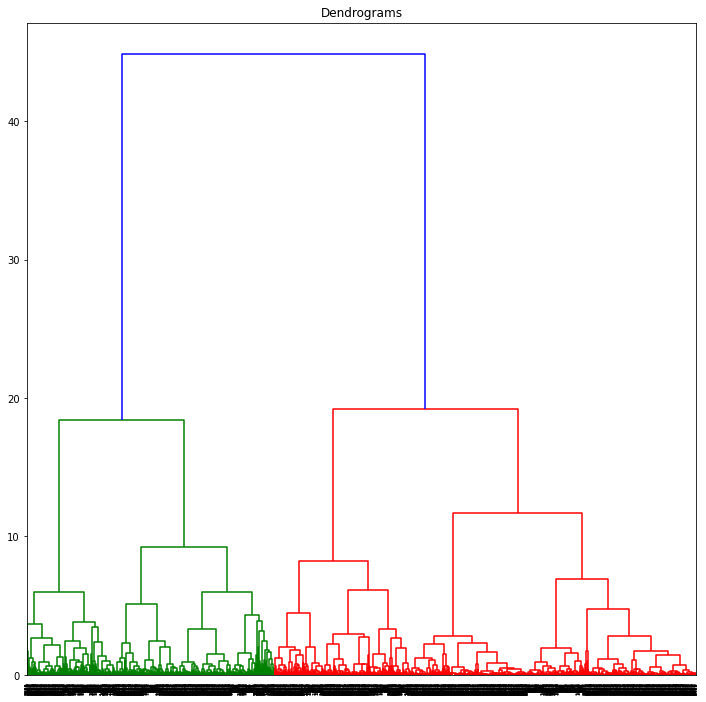

In [19]:
plt.figure(figsize=(12, 12))  
plt.title("Dendrograms")
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [21]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [22]:
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [23]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [24]:
df['h_clusterid'] = Clusters

In [26]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


K-Means

In [25]:
 from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])

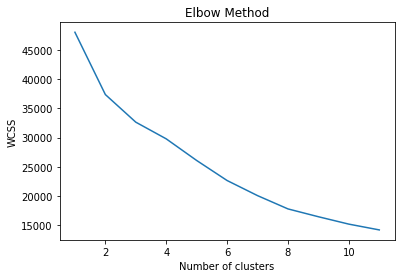

In [29]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
from sklearn.cluster import KMeans
clusters_new = KMeans(16, random_state=8)
clusters_new.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=8, tol=0.0001, verbose=0)

In [31]:
clusters_new.labels_

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [33]:
df['clusterid_new'] = clusters_new.labels_

In [35]:
clusters_new.cluster_centers_

array([[-2.83629923e-01, -1.48638608e-01, -7.68575160e-01,
        -9.82418871e-02, -5.56912739e-02, -6.12353579e-01,
        -6.37024119e-01, -2.23760705e-01, -2.39440039e-01,
         7.17551975e-01, -7.66919299e-01, -9.63661385e-01],
       [-1.11559127e-01, -9.62798685e-02,  4.43056407e-01,
        -9.82418871e-02, -6.27665798e-02,  2.61226815e-02,
         5.40086018e-01, -1.93350297e-01, -2.16184114e-01,
         1.82350392e-01,  1.30391816e+00, -3.89549909e-02],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01,  1.38285580e+00],
       [ 9.13530043e-01,  8.53443541e-01, -4.32286194e-02,
        -9.82418871e-02, -6.27665798e-02,  8.98750542e-01,
         2.66646229e+00,  7.62667101e+00,  6.86587725e+00,
        -1.49031591e-01,  1.16110178e+00,  6.00540118e-01],
       [-4.38479238e-01, -1.38756546e-01, -7.6957840

In [36]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1160.204420,45021.907459,29.132597,1.001381,1,1.001381,2357.763812,5.484807,146.783149,0.465470,5600.215470,0.000000,0.002762
1,1,1825.378531,62360.288136,69.635593,2.669492,1,1.000000,17775.655367,16.788136,189.358757,0.553672,4495.090395,1.000000,1.000000
2,2,1664.866667,138061.400000,78.800000,3.466667,1,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,2.533333
3,3,2148.965517,165651.413793,804.310345,2.000000,1,1.000000,38847.827586,37.206897,11137.655172,27.413793,3810.827586,0.931034,1.689655
4,4,3210.712375,29418.816054,36.777035,1.000000,1,1.000000,2225.593088,4.986622,100.534002,0.361204,1967.371237,0.000000,0.000000
5,5,1582.641304,77103.171196,68.125000,4.279891,1,1.002717,46767.779891,18.728261,280.581522,0.872283,4884.483696,1.000000,3.000000
6,6,746.384615,829380.192308,412.692308,3.384615,1,1.000000,52341.384615,21.307692,1380.423077,5.615385,6700.000000,0.846154,2.153846
7,7,2049.960784,115705.686275,5802.921569,1.921569,1,1.000000,16682.235294,11.882353,863.980392,2.627451,3972.215686,0.490196,1.313725
8,8,1130.956164,131893.306849,11.983562,3.616438,1,1.000000,32252.531507,16.619178,163.120548,0.463014,5700.649315,0.002740,1.997260


DBSCAN

In [37]:
print(df.head())

   ID#  Balance  Qual_miles  ...  Award?  h_clusterid  clusterid_new
0    1    28143           0  ...       0            0              0
1    2    19244           0  ...       0            0              0
2    3    41354           0  ...       0            0              0
3    4    14776           0  ...       0            0              0
4    5    97752           0  ...       1            3              5

[5 rows x 14 columns]


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  h_clusterid        3999 non-null   int64
 13  clusterid_new      3999 non-null   int32
dtypes: int32(1), int64(13)
memory usage: 421.9 KB
None


In [39]:
df.drop(['ID#','Balance'],axis=1,inplace=True)

In [40]:
array=df.values

In [41]:
array

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 3, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 0, 4],
       [0, 1, 1, ..., 0, 0, 4]])

In [42]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [43]:
X

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.7669193 ,
        -0.9662229 , -1.27543497],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.7669193 ,
        -0.9662229 , -1.27543497],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.7669193 ,
        -0.9662229 , -1.27543497],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ...,  1.30391816,
        -0.03895499, -1.04978066],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.7669193 ,
        -0.9662229 , -0.37281772],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.7669193 ,
        -0.9662229 , -0.37281772]])

In [47]:
dbscan = DBSCAN(eps=2, min_samples=7)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

In [50]:
dbscan.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [51]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [52]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,3
3995,3
3996,3
3997,0


In [53]:
pd.concat([df,cl],axis=1)

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,cluster
0,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,0,4,1,1,43300,26,2077,4,6935,1,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0,1,1,1,8525,4,200,1,1403,1,1,12,3
3995,0,1,1,1,981,5,0,0,1395,1,1,12,3
3996,0,3,1,1,25447,8,0,0,1402,1,1,1,3
3997,0,1,1,1,500,1,500,1,1401,0,0,4,0
